In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING DATASET
# Importing the dataset
df = pd.read_excel('Exercise_2_Descriptive_Stats.xlsx')

In [3]:
df.head()

,ID,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_#,Area_(ft.),Price_in_euros,Status
0,1030,1,2005,11,Apartment,30,743.0856,246172.6760,Sold
1,1029,1,2005,10,Apartment,29,756.2128,246331.9040,Sold
2,2002,2,2007,7,Apartment,2,587.2808,209280.9104,Sold
3,2031,2,2007,12,Apartment,31,1604.7464,452667.0064,Sold
4,1049,1,2004,11,Apartment,49,1375.4508,467083.3132,Sold


In [4]:
df.describe()

,ID,Building,Year_of_sale,Month_of_sale,Property_#,Area_(ft.),Price_in_euros
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2975.142322,2.947566,2007.591760,6.588015,27.580524,936.221113,281171.901501
std,1392.197474,1.391794,2.268203,3.511893,15.361437,284.895016,89119.120849
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.709200,117564.071600
25%,2015.500000,2.000000,2006.000000,3.000000,14.500000,756.212800,217553.056400
50%,3024.000000,3.000000,2007.000000,7.000000,28.000000,798.284400,249075.656800
75%,4031.500000,4.000000,2011.000000,10.000000,40.000000,1121.945200,326964.852200
max,5052.000000,5.000000,2011.000000,12.000000,59.000000,1942.502800,538271.735600


In [5]:
df.dtypes

ID                    int64
Building              int64
Year_of_sale          int64
Month_of_sale         int64
Type_of_property     object
Property_#            int64
Area_(ft.)          float64
Price_in_euros      float64
Status               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                267 non-null    int64  
 1   Building          267 non-null    int64  
 2   Year_of_sale      267 non-null    int64  
 3   Month_of_sale     267 non-null    int64  
 4   Type_of_property  267 non-null    object 
 5   Property_#        267 non-null    int64  
 6   Area_(ft.)        267 non-null    float64
 7   Price_in_euros    267 non-null    float64
 8   Status            267 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 18.9+ KB


## Finding out attribute types:

In [7]:
# Initialize empty dictionaries to store column labels
column_labels = {}

# Loop through columns and label them based on data type
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'object' or dtype.name == 'category':
        column_labels[column] = 'Categorical'
    elif dtype in ['int64', 'float64']:
        column_labels[column] = 'Numerical'
    else:
        column_labels[column] = 'Other'

# Display the labels
for column, label in column_labels.items():
    print(f'Column: {column}, Type: {label}')

Column: ID, Type: Numerical
Column: Building, Type: Numerical
Column: Year_of_sale, Type: Numerical
Column: Month_of_sale, Type: Numerical
Column: Type_of_property, Type: Categorical
Column: Property_#, Type: Numerical
Column: Area_(ft.), Type: Numerical
Column: Price_in_euros, Type: Numerical
Column: Status, Type: Categorical


## Finding missing values:


In [8]:
# Count missing values in each column
missing_values = df.isna().sum()

In [9]:
# Print the result
print(missing_values)

ID                  0
Building            0
Year_of_sale        0
Month_of_sale       0
Type_of_property    0
Property_#          0
Area_(ft.)          0
Price_in_euros      0
Status              0
dtype: int64


## Distinct values:

In [10]:
# Get distinct values in all columns
distinct_values = {}

for column in df.columns:
    distinct_values[column] = df[column].unique()

# Print distinct values in all columns
for column, values in distinct_values.items():
    print(f'Distinct values in column {column}:')
    print(values)

Distinct values in column ID:
[1030 1029 2002 2031 1049 3011 3026 3023 1031 4023 1036 1046 4035 2036
 2056 1047 5051 2007 3020 3029 3015 2004 2006 5013 1026 2054 3033 1025
 3027 3031 2043 3034 3016 1018 2050 2044 3039 3053 2041 5035 4005 1032
 3046 1041 1012 5033 4006 5040 4013 1003 2009 4024 4012 1035 2017 4051
 3014 2051 2025 3047 2046 5016 4041 4018 2005 2010 2022 2047 2012 3038
 4030 3017 1045 2040 2042 2048 3049 1017 1039 2049 3054 3055 3042 1038
 2020 2014 3001 3043 2016 4049 4022 3059 4034 5027 5028 2026 3022 2024
 3003 2011 2028 3028 3036 4010 4011 3035 3037 2032 2018 2035 5025 2029
 3007 3030 2003 5039 5030 3041 2057 4028 3032 3013 1040 4031 4019 4029
 1021 1006 2034 3021 5021 5022 1044 1043 1027 2023 5046 1002 2030 3050
 5050 2039 2008 3019 2015 2033 2019 2021 2027 2052 3006 3044 4025 1015
 5041 5036 2037 5034 4016 4040 1024 2013 3010 3018 1033 1016 3005 5019
 3002 3004 3012 3048 3008 3040 1023 3009 3052 3025 5052 1005 1009 1011
 1007 1008 2038 2001 1013 1014 1019 1020 1022 1

## Find the correlation between Area and Price

In [11]:
correlation = df['Area_(ft.)'].corr(df['Price_in_euros'])

In [12]:
correlation

0.951087377431621

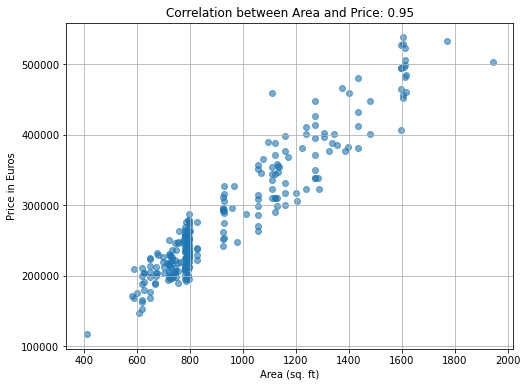

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Area_(ft.)'], df['Price_in_euros'], alpha=0.6)
plt.title(f'Correlation between Area and Price: {correlation:.2f}')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price in Euros')
plt.grid(True)
plt.show()

A correlation coefficient of 0.951087 indicates a strong positive linear relationship between two variables. Here's how to interpret it:

* The correlation coefficient, which ranges from -1 to 1, measures the strength and direction of a linear relationship between two variables.

* A value of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases linearly.

* In this case, a correlation coefficient of 0.951087, which is very close to 1, suggests that there is a strong positive linear relationship between the 'Area_ft' (square footage) and 'Price in Euros' in your real estate property sales data.

In practical terms, it means that as the area (square footage) of a property increases, the price in Euros tends to increase significantly in a linear fashion. This information is valuable for understanding the relationship between these two variables, which can be useful for pricing or evaluating real estate properties.

## Represent Sales by Year

In [14]:
#Group the data by the 'Year' column and count the number of sales in each year:

yearly_sales = df['Year_of_sale'].value_counts().reset_index()
yearly_sales.columns = ['Year_of_sale', 'Sales_Count']

In [15]:
max_sales_year = yearly_sales[yearly_sales['Sales_Count'] == yearly_sales['Sales_Count'].max()]['Year_of_sale'].values[0]


In [16]:
# Sort the DataFrame by 'Sales Count' in descending order
yearly_sales = yearly_sales.sort_values(by='Sales_Count', ascending=False)
yearly_sales
                                        

,Year_of_sale,Sales_Count
0,2007,102
1,2011,72
2,2006,40
3,2005,27
4,2004,16
5,2008,9
6,2010,1


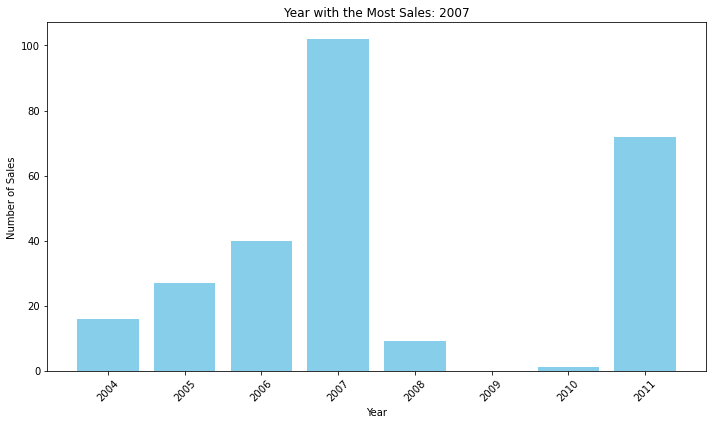

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year_of_sale'], yearly_sales['Sales_Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title(f"Year with the Most Sales: {max_sales_year}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df

,ID,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_#,Area_(ft.),Price_in_euros,Status
0,1030,1,2005,11,Apartment,30,743.0856,246172.6760,Sold
1,1029,1,2005,10,Apartment,29,756.2128,246331.9040,Sold
2,2002,2,2007,7,Apartment,2,587.2808,209280.9104,Sold
3,2031,2,2007,12,Apartment,31,1604.7464,452667.0064,Sold
4,1049,1,2004,11,Apartment,49,1375.4508,467083.3132,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,2011,1,Apartment,44,1238.5836,322610.7392,Sold
263,5047,5,2011,9,Apartment,47,794.5184,279191.2560,Sold
264,5048,5,2011,10,Apartment,48,1013.2692,287996.5296,Sold
265,5050,5,2011,6,Apartment,50,1074.7088,365868.7776,Sold


## Represent Sales by Month

In [19]:
# Create a mapping from month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map the 'Month' column to month names
df['Month_of_sale'] = df['Month_of_sale'].map(month_names)

# Group the data by the 'Month' column and count the number of sales in each month
monthly_sales = df['Month_of_sale'].value_counts().reset_index()
monthly_sales.columns = ['Month_of_sale', 'Sales_Count']

# Sort the DataFrame by 'Sales Count' in descending order
monthly_sales = monthly_sales.sort_values(by='Sales_Count', ascending=False)
monthly_sales

,Month_of_sale,Sales_Count
0,March,29
1,October,28
2,November,27
3,May,25
4,September,24
5,January,22
6,December,20
7,February,20
8,June,19
9,July,18


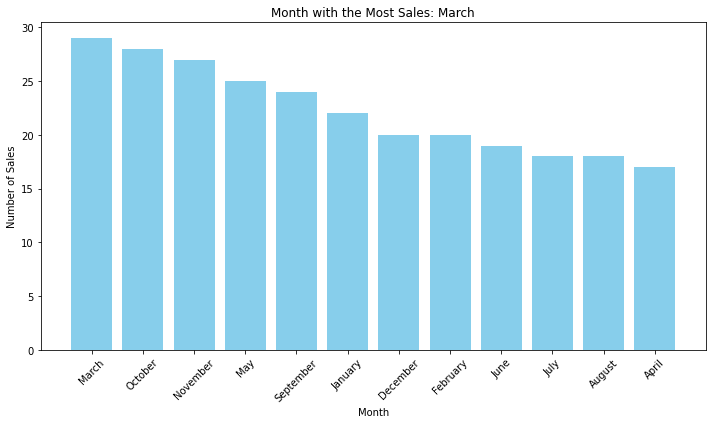

In [20]:

# Find the month with the highest number of sales
max_sales_month = monthly_sales.iloc[0]['Month_of_sale']

# Create a bar plot to visualize the sales count for each month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month_of_sale'], monthly_sales['Sales_Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title(f"Month with the Most Sales: {max_sales_month}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Which building has more properties??

In [21]:
# Group the data by the 'Building' column and count the number of properties for each building
building_counts = df['Building'].value_counts().reset_index()
building_counts.columns = ['Building', 'Property_Count']

# Sort the DataFrame by 'Property Count' in descending order
building_counts = building_counts.sort_values(by='Property_Count', ascending=False)

building_counts

,Building,Property_Count
0,3,63
1,2,57
2,1,52
3,5,52
4,4,43


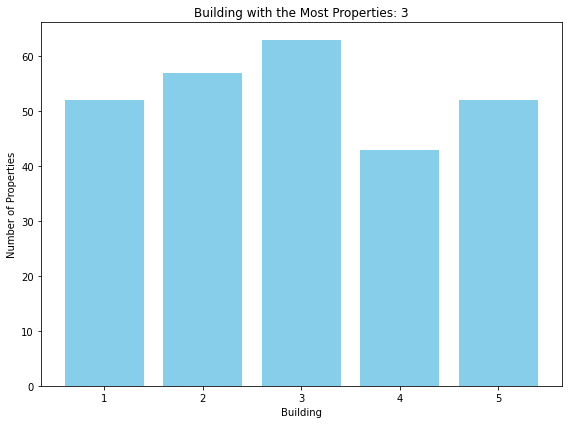

In [22]:
# Find the building with the most properties
max_properties_building = building_counts.iloc[0]['Building']

# Create a bar plot to visualize the number of properties for each building
plt.figure(figsize=(8, 6))
plt.bar(building_counts['Building'], building_counts['Property_Count'], color='skyblue')
plt.xlabel('Building')
plt.ylabel('Number of Properties')
plt.title(f"Building with the Most Properties: {max_properties_building}")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
df

,ID,Building,Year_of_sale,Month_of_sale,Type_of_property,Property_#,Area_(ft.),Price_in_euros,Status
0,1030,1,2005,November,Apartment,30,743.0856,246172.6760,Sold
1,1029,1,2005,October,Apartment,29,756.2128,246331.9040,Sold
2,2002,2,2007,July,Apartment,2,587.2808,209280.9104,Sold
3,2031,2,2007,December,Apartment,31,1604.7464,452667.0064,Sold
4,1049,1,2004,November,Apartment,49,1375.4508,467083.3132,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,2011,January,Apartment,44,1238.5836,322610.7392,Sold
263,5047,5,2011,September,Apartment,47,794.5184,279191.2560,Sold
264,5048,5,2011,October,Apartment,48,1013.2692,287996.5296,Sold
265,5050,5,2011,June,Apartment,50,1074.7088,365868.7776,Sold


## Plot Type of Property in a Pie chart

In [24]:
# Count the frequency of values in the 'Type_of_property' column
property_counts = df['Type_of_property'].value_counts()

property_counts

Apartment    259
Office         8
Name: Type_of_property, dtype: int64

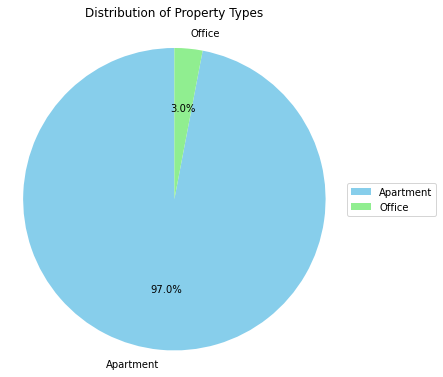

In [25]:
# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 6))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Property Types', pad=20)  # Adjust the title position with 'pad'
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Move the legend to a position outside the pie chart
plt.legend(property_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the pie chart
plt.show()




Very little number of offices.